# Advanced Computational Physics


## More about Python: Functions, Classes and Symbolic computing
### Numeric and Scientific Computing with NumPy and SciPy


#### *X. Cid Vidal*
####  USC, October 2025

In this lesson, we explore two of the pillars of scientific computing in Python: **NumPy** and **SciPy**.

- **NumPy** provides fast and efficient operations on arrays and matrices.
- **SciPy** builds on NumPy and offers advanced scientific tools such as optimization, interpolation, statistics, and more.

**Structure:**

- Numpy:
  - Intro & NumPy idioms
  - Array creation, slicing, broadcasting, indexing, memory
- Scipy
  - Linear algebra (dense and sparse)
  - Interpolation and smoothing
  - Optimization & function fitting (least-squares, curve_fit, covariance)

### Further Reading
- [NumPy official tutorials](https://numpy.org/learn)
- [SciPy documentation](https://docs.scipy.org/doc/scipy/)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

In [ ]:
# Setup: imports and display settings
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
import math

import scipy
import scipy.linalg as la
import scipy.sparse as sps
import scipy.sparse.linalg as spla
import scipy.optimize as opt
import scipy.interpolate as interp
from scipy import stats


%matplotlib inline

print('NumPy', np.__version__)
print('SciPy', scipy.__version__)


NumPy 1.21.6
SciPy 1.6.2



## What is Numpy?
**NumPy** handles efficient array operations, broadcasting, and basic linear algebra.




### NumPy quick recap: arrays, dtype, shape, basic ops

Examples below demonstrate common array creations and idioms.

In [ ]:
# Array creation and basic properties
A = np.array([[1,2,3],[4,5,6]], dtype=float)
print('A:\n', A)
print('shape:', A.shape, 'dtype:', A.dtype)

v = np.arange(0,10,2)
print('v:', v)

# linspace and meshgrid for surfaces
x = np.linspace(-2,2,101)
y = np.linspace(-1,1,61)
X, Y = np.meshgrid(x,y)
print('X shape, Y shape:', X.shape, Y.shape)


A:
 [[1. 2. 3.]
 [4. 5. 6.]]
shape: (2, 3) dtype: float64
v: [0 2 4 6 8]
X shape, Y shape: (61, 101) (61, 101)



## Indexing and Slicing in NumPy

Indexing and slicing are central to NumPy’s efficiency and expressiveness. Mastering them will make your code faster and cleaner.

### Basic Indexing
```python
a[i, j]
```
Accesses the element at row *i*, column *j*.

### Slicing
```python
a[start:stop:step]
```
Allows you to select subarrays easily.


In [ ]:

a = np.arange(1, 13).reshape(3, 4)
print("Original array:\n", a)

print("\nFirst two rows:")
print(a[:2, :])

print("\nLast two columns:")
print(a[:, -2:])


Original array:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

First two rows:
[[1 2 3 4]
 [5 6 7 8]]

Last two columns:
[[ 3  4]
 [ 7  8]
 [11 12]]


### Advanced indexing & boolean masks

Use boolean masks or fancy indexing to select data.

In [ ]:
M = np.arange(20)
mask = (M % 3 == 0)
print('mask sample:', M[mask])

# Fancy indexing
idx = [0,3,5]
print('selected:', M[idx])


mask sample: [ 0  3  6  9 12 15 18]
selected: [0 3 5]


### `np.einsum` for flexible contractions

`np.einsum` can express many linear algebra operations concisely and sometimes faster. `einsum = Einstein summation`


In [ ]:
rng = np.random.default_rng()
A = rng.random((3,4))
B = rng.random((4,5))
# standard matrix multiply
C1 = A.dot(B)
# einsum equivalent: Sum over j of A[i, j] * B[j, k]
C2 = np.einsum('ij,jk->ik', A, B)
print('difference:', np.max(np.abs(C1-C2)))


difference: 2.220446049250313e-16



### Views vs. Copies

- **Slicing** returns a **view** (no data copied).
- **Fancy indexing** or **boolean indexing** returns a **copy**.


In [ ]:

mask = a > 6
print("Mask:\n", mask)
print("\nElements > 6:", a[mask])


Mask:
 [[False False False False]
 [False False  True  True]
 [ True  True  True  True]]

Elements > 6: [ 7  8  9 10 11 12]


**Another example**: Slices of NumPy arrays are views (no copy) when possible. Use `.copy()` to force an independent array.

In [ ]:
A = np.arange(12).reshape(3,4)
slice_view = A[:,1:3]
print('Before modification, A:\n', A)
slice_view[0,0] = -99
print('After modifying view, A:\n', A)

copy = A[:,1:3].copy()
copy[0,0] = 999
print('After modifying copy, A unchanged:\n', A)


Before modification, A:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
After modifying view, A:
 [[  0 -99   2   3]
 [  4   5   6   7]
 [  8   9  10  11]]
After modifying copy, A unchanged:
 [[  0 -99   2   3]
 [  4   5   6   7]
 [  8   9  10  11]]


### Visualizing Slicing

Here we use `imshow()` to visualize how a subarray corresponds to a region of a larger array.


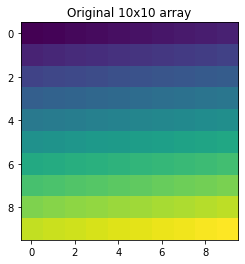

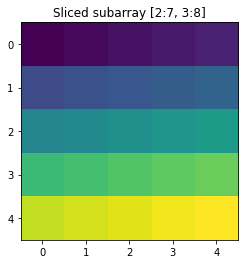

In [ ]:

import matplotlib.pyplot as plt

img = np.arange(100).reshape(10, 10)
plt.imshow(img, cmap='viridis')
plt.title("Original 10x10 array")
plt.show()

sub = img[2:7, 3:8]
plt.imshow(sub, cmap='viridis')
plt.title("Sliced subarray [2:7, 3:8]")
plt.show()



## Broadcasting in NumPy

One of NumPy’s most powerful features is **broadcasting** — the ability to apply arithmetic operations on arrays of different shapes without writing explicit loops.

Two dimensions are **compatible** if:
- They are equal, or
- One of them is 1.

When operating on two arrays, NumPy automatically expands them to a common shape where possible. Here, `a` has shape `(3,)` and `b` has shape `(3, 1)`. NumPy expands them both to `(3, 3)` for the operation.


In [ ]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([[10], [20], [30]])

print("Shape of a:", a.shape)
print("Shape of b:", b.shape)
print("\nBroadcasted result:")
print(a + b)

Shape of a: (3,)
Shape of b: (3, 1)

Broadcasted result:
[[11 12 13]
 [21 22 23]
 [31 32 33]]


**Another example**: add a 1D array to each row of a 2D array.


In [ ]:
A = np.ones((4,3))
v = np.array([0,10,20])
print('A + v =')
print(A + v)

# More subtle broadcasting
M = np.arange(12).reshape(3,4)
col_mean = M.mean(axis=0)
print('M:\n', M)
print('col_mean:', col_mean)
print('M - col_mean (broadcasted):\n', M - col_mean)


A + v =
[[ 1. 11. 21.]
 [ 1. 11. 21.]
 [ 1. 11. 21.]
 [ 1. 11. 21.]]
M:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
col_mean: [4. 5. 6. 7.]
M - col_mean (broadcasted):
 [[-4. -4. -4. -4.]
 [ 0.  0.  0.  0.]
 [ 4.  4.  4.  4.]]


### Vectorization vs Python loops

Using vectorized NumPy operations is usually much faster than Python loops. We demonstrate this with a simple example.


In [ ]:
def loop_sum(x):
    # x is (N,d) array. compute sum over axis 1 via Python loop
    N = x.shape[0]
    out = np.empty(N)
    for i in range(N):
        s = 0.0
        for j in range(x.shape[1]):
            s += x[i,j]
        out[i] = s
    return out

rng = np.random.default_rng(42)
x = rng.random((2000,50))

start = perf_counter(); _ = np.sum(x,axis=1); t_vec = perf_counter()-start
start = perf_counter(); _ = loop_sum(x); t_loop = perf_counter()-start
print(f'vectorized np.sum: {t_vec:.4f} s, Python loop: {t_loop:.4f} s')


vectorized np.sum: 0.0001 s, Python loop: 0.0173 s


### Mini-exercise: 2D Gaussian surface

Create and visualize a 2D Gaussian on a grid. This tests meshgrid, broadcasting and basic plotting.


Text(0, 0.5, 'y')

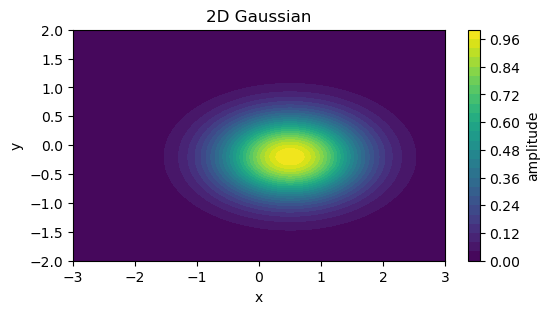

In [21]:
# 2D Gaussian
x = np.linspace(-3,3,151)
y = np.linspace(-2,2,101)
X,Y = np.meshgrid(x,y)

def gaussian2d(x,y,x0=0,y0=0,sx=1.0,sy=1.0,rho=0.0):
    Xc = x - x0
    Yc = y - y0
    Z = np.exp(-0.5*((Xc/sx)**2 + (Yc/sy)**2 - 2*rho*(Xc/sx)*(Yc/sy)))
    return Z

Z = gaussian2d(X,Y, x0=0.5, y0=-0.2, sx=0.8, sy=0.5)

plt.figure(figsize=(6,3))
plt.contourf(X, Y, Z, levels=30)
plt.colorbar(label='amplitude')
plt.title('2D Gaussian')
plt.xlabel('x'); plt.ylabel('y')



## What is SciPy?

**SciPy** (short for *Scientific Python*) extends NumPy by providing high-level scientific algorithms. It includes many specialized modules, such as:

| Submodule | Description |
|------------|--------------|
| `scipy.linalg` | Advanced linear algebra (beyond NumPy’s `linalg`) |
| `scipy.optimize` | Optimization and curve fitting |
| `scipy.interpolate` | Interpolation and splines |
| `scipy.stats` | Probability distributions and statistics |
| `scipy.constants` | Physical constants |
| `scipy.signal` | Signal processing and filtering |
| `scipy.sparse` | Sparse matrices and solvers |
| `scipy.fft` | Fast Fourier transforms |

Let’s look at some simple examples from these modules.


In [ ]:

from scipy import constants, stats, interpolate

print("Speed of light (m/s):", constants.c)
print("Avogadro's number:", constants.N_A)

# Simple interpolation example
x = np.linspace(0, 10, 10)
y = np.sin(x)
f_interp = interpolate.interp1d(x, y, kind='cubic')
print("Interpolated value at x=5.5:", f_interp(5.5))

# Sampling from a normal distribution
data = stats.norm.rvs(size=1000)
print("Mean and std of sample:", np.mean(data), np.std(data))


Speed of light (m/s): 299792458.0
Avogadro's number: 6.02214076e+23
Interpolated value at x=5.5: -0.7049859623693028
Mean and std of sample: 0.027212102803808976 0.9957774434827026


## Linear algebra with NumPy and SciPy

Use SciPy to solve linear systems, compute eigenvalues, etc with specific specialized routines.

In numerical computations, matrices might be close to singular (non-invertible).
Adding a small value to the diagonal — a trick called regularization or Tikhonov stabilization, to ensure one can safely solve the system. Ill-conditioned matrices amplify noise!

In [ ]:
# Solve Ax = b using numpy and scipy.
# Note @ = np.dot() for 2D arrays (matrices).
N = 200
A = rng.normal(size=(N,N))
# Tikhonov stabilization: make symmetric positive definite.
A = A.T @ A + 1e-3*np.eye(N) ## np.eye adds a small multiple (1e-3) of the identity matrix.
b = rng.normal(size=(N,))

start = perf_counter(); x_np = np.linalg.solve(A,b); t_np = perf_counter()-start
start = perf_counter(); x_sp = la.solve(A,b); t_sp = perf_counter()-start
print(f'np.linalg.solve: {t_np:.4f} s, scipy.linalg.solve: {t_sp:.4f} s')
print('residual norm:', np.linalg.norm(A@x_np-b))


np.linalg.solve: 0.0098 s, scipy.linalg.solve: 0.0123 s
residual norm: 1.478061834033116e-11


### Eigenvalues and eigenvectors

Compute eigenvalues for symmetric matrices using `la.eigh`.

In [ ]:
# small symmetric matrix eigen decomposition
M = rng.normal(size=(80,80))
M = M + M.T
w, v = la.eigh(M)
print('smallest eigenvalue:', w[0])
print('first eigenvector:',v[0])

smallest eigenvalue: -24.728797948509314
first eigenvector: [ 0.19554278 -0.05329844  0.0659406  -0.02892178  0.09859904 -0.02335454
  0.11688494  0.1622831  -0.05905784  0.00817115 -0.07331356  0.12102389
 -0.13155997 -0.02682465 -0.03516737  0.08607032 -0.08443019 -0.01810881
 -0.0198124  -0.00545706 -0.11139418 -0.02837197  0.08645945 -0.1581442
  0.04715134 -0.00523616 -0.02242555  0.00995116 -0.01803874 -0.15184858
 -0.03024793  0.01802136 -0.06792031  0.1791517  -0.14663142 -0.10793698
 -0.07759081  0.11248423 -0.03112629  0.05705951 -0.06372366  0.13737431
  0.03461514  0.00217995  0.12765998 -0.14878972  0.22160386  0.03216484
  0.12574887  0.27081157 -0.17649869  0.26442177 -0.06874385  0.05311465
  0.1748406   0.02476288  0.10527649 -0.05058282 -0.04969695  0.20339441
  0.10088929 -0.06294632 -0.08556253  0.06485362  0.18228531 -0.02970261
  0.07719989 -0.0908565   0.14208854  0.03453308 -0.07523414  0.04926855
 -0.05011728 -0.08521307 -0.04042056  0.10994954 -0.19479531 -0.1

## Interpolation and smoothing (`scipy.interpolate`)

Common tools: `interp1d`, `UnivariateSpline`, `LSQUnivariateSpline`, and `griddata` for scattered data.


Text(0.5, 1.0, 'interp1d linear vs cubic')

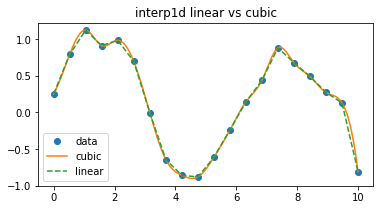

In [ ]:
# Cubic interpolation of noisy data
xs = np.linspace(0,10,20)
ys = np.sin(xs) + 0.2*rng.standard_normal(xs.shape)

f_lin = interp.interp1d(xs, ys, kind='linear')
f_cubic = interp.interp1d(xs, ys, kind='cubic')

xs_fine = np.linspace(0,10,400)
plt.figure(figsize=(6,3))
plt.plot(xs, ys, 'o', label='data')
plt.plot(xs_fine, f_cubic(xs_fine), '-', label='cubic')
plt.plot(xs_fine, f_lin(xs_fine), '--', label='linear')
plt.legend(); plt.title('interp1d linear vs cubic')


Text(0.5, 1.0, 'Smoothing spline')

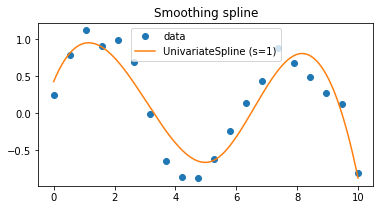

In [ ]:
# UnivariateSpline smoothing (s parameter controls smoothing)
sp = interp.UnivariateSpline(xs, ys, s=1.0)
plt.figure(figsize=(6,3))
plt.plot(xs, ys, 'o', label='data')
plt.plot(xs_fine, sp(xs_fine), '-', label='UnivariateSpline (s=1)')
plt.legend(); plt.title('Smoothing spline')


### Scattered data interpolation (`griddata`)

Useful when data points are irregularly spaced in 2D.


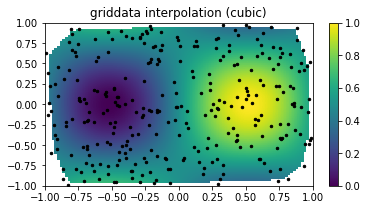

In [ ]:
from scipy.interpolate import griddata

# create scattered samples from a smooth 2D function
pts = rng.random((300,2))*2 - 1
vals = np.sin(pts[:,0]*3)*np.cos(pts[:,1]*2)
# grid
gx = np.linspace(-1,1,100)
gy = np.linspace(-1,1,80)
GX, GY = np.meshgrid(gx, gy)
ZI = griddata(pts, vals, (GX, GY), method='cubic')

plt.figure(figsize=(6,3))
plt.imshow(ZI, extent=(-1,1,-1,1), origin='lower', aspect='auto')
plt.scatter(pts[:,0], pts[:,1], s=6, c='k')
plt.title('griddata interpolation (cubic)')
plt.colorbar()


## Optimization (`scipy.optimize`)

Methods include `minimize`, `least_squares`, `curve_fit` (wrapper), and root-finding utilities. We'll focus on optimization and fitting.


In [ ]:
# minimize a 2D Rosenbrock function
from scipy.optimize import minimize

def rosen(x):
    return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

res = minimize(rosen, x0=[-1.2,1.0], method='BFGS')
print('success:', res.success, 'x:', res.x)


success: True x: [0.99999336 0.9999867 ]


## Curve fitting: `scipy.optimize.curve_fit`

Convenient wrapper around least-squares for common curve-fitting tasks. It returns best-fit parameters and covariance estimate.


popt: [2.08287799 1.24574969 0.51542965]
1-sigma errors: [0.06006817 0.09172756 0.03800748]


Text(0.5, 1.0, 'curve_fit example')

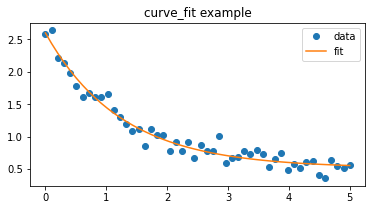

In [ ]:
from scipy.optimize import curve_fit

# synthetic data: exponential decay + offset
def exp_model(x, A, tau, C):
    return A * np.exp(-x/tau) + C

xdata = np.linspace(0,5,50)
ydata = exp_model(xdata, 2.0, 1.3, 0.5) + 0.1*rng.standard_normal(xdata.shape)

popt, pcov = curve_fit(exp_model, xdata, ydata, p0=[1.5,1.0,0.4])
perr = np.sqrt(np.diag(pcov))
print('popt:', popt)
print('1-sigma errors:', perr)

plt.figure(figsize=(6,3))
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, exp_model(xdata, *popt), '-', label='fit')
plt.legend(); plt.title('curve_fit example')


### `least_squares` for more control

`least_squares` lets you supply bounds, robust loss functions, and retrieve Jacobians for uncertainty estimation.


success: True
params: [1.20375306 2.0973376  0.52054018 0.100315  ]
[[  0.49734884   0.           1.04431675   1.        ]
 [  0.55693029   0.03343773   0.99978822   1.        ]
 [  0.61377259   0.06356806   0.95034243   1.        ]
 ...
 [  0.59520646  -9.6083308   -0.96730325   1.        ]
 [  0.5374223  -10.11745906  -1.01514093   1.        ]
 [  0.47699492 -10.57985935  -1.05798585   1.        ]]


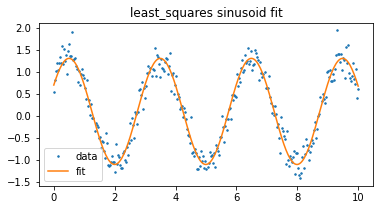

In [ ]:
from scipy.optimize import least_squares

# Fit a sinusoid: A*sin(omega t + phi) + offset
def sin_model(t, p):
    A, omega, phi, C = p
    return A * np.sin(omega*t + phi) + C

# generate data
t = np.linspace(0,10,300)
true_p = [1.2, 2.1, 0.5, 0.1]
y = sin_model(t, true_p) + 0.2*rng.standard_normal(t.shape)

# residuals function
def residuals(p, t, y):
    return sin_model(t,p) - y

res = least_squares(residuals, x0=[1.0,2.0,0.0,0.0], args=(t,y))
print('success:', res.success)
print('params:', res.x)

plt.figure(figsize=(6,3))
plt.plot(t, y, '.', markersize=3, label='data')
plt.plot(t, sin_model(t, res.x), '-', label='fit')
plt.legend(); plt.title('least_squares sinusoid fit')
print(res.jac)

## Polynomial fitting with numpy

An alternative implies the use of NumPy. For instance, for polynomials, `np.polyfit`, provides an easy alternative.


coeffs: [ 1.63071049  0.04957606 -0.76070343  0.17433876]


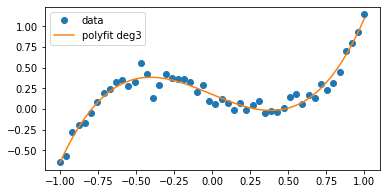

In [ ]:
# polynomial fit with np.polyfit
x = np.linspace(-1,1,50)
y = 1.5*x**3 - 0.7*x + 0.2 + 0.1*rng.standard_normal(x.shape)
coeffs = np.polyfit(x,y,3)
print('coeffs:', coeffs)

# evaluate
p = np.poly1d(coeffs)
plt.figure(figsize=(6,3))
plt.plot(x,y,'o',label='data')
xs = np.linspace(-1,1,200)
plt.plot(xs, p(xs), '-', label='polyfit deg3')
plt.legend()


Text(0.5, 1.0, 'Overfitting example')

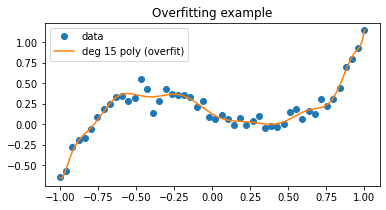

In [ ]:
# overfitting demonstration: high-degree polynomial on noisy data
coeffs_over = np.polyfit(x,y,15)
po = np.poly1d(coeffs_over)
plt.figure(figsize=(6,3))
plt.plot(x,y,'o',label='data')
plt.plot(xs, po(xs), '-', label='deg 15 poly (overfit)')
plt.legend(); plt.title('Overfitting example')


## Practical example: fit a sum of Gaussians to noisy data

This is a common physics use-case (spectral peaks). We show model definition, initial guesses, bounds, and covariance estimation.


params: [ 1.20679997 -0.99963881  0.50650907  0.80758558  1.20733631  0.78259604]
1sigma errors: [0.01169519 0.00666799 0.00673831 0.00966414 0.01218648 0.01345366]


Text(0.5, 1.0, 'Sum of Gaussians fit')

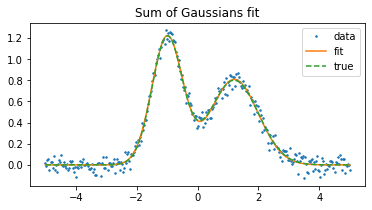

In [ ]:
# generate synthetic spectrum
xs = np.linspace(-5,5,300)
def gauss(x,A,mu,sigma):
    return A*np.exp(-0.5*((x-mu)/sigma)**2)

true = gauss(xs, 1.2, -1.0, 0.5) + gauss(xs, 0.8, 1.2, 0.8)
ys = true + 0.05*rng.standard_normal(xs.shape)

# model: sum of two gaussians
def model_sum2(x, A1, mu1, s1, A2, mu2, s2):
    return gauss(x,A1,mu1,s1) + gauss(x,A2,mu2,s2)

p0 = [1.0, -0.8, 0.6, 0.7, 1.0, 1.0]
params, pcov = curve_fit(model_sum2, xs, ys, p0=p0)
perr = np.sqrt(np.diag(pcov))
print('params:', params)
print('1sigma errors:', perr)

plt.figure(figsize=(6,3))
plt.plot(xs, ys, '.', markersize=3, label='data')
plt.plot(xs, model_sum2(xs, *params), '-', label='fit')
plt.plot(xs, true, '--', label='true')
plt.legend(); plt.title('Sum of Gaussians fit')


### Residual diagnostics and goodness-of-fit

Plot residuals, compute reduced chi-square, and look for structure in residuals that indicates model mismatch.


chi2: 285.48663947737515 reduced chi2: 0.9710429914196433


Text(0.5, 1.0, 'Residuals')

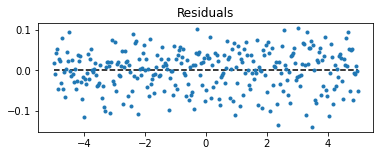

In [ ]:
resid = ys - model_sum2(xs, *params)
chi2 = np.sum((resid/0.05)**2)
ndof = len(xs) - len(params)
print('chi2:', chi2, 'reduced chi2:', chi2/ndof)

plt.figure(figsize=(6,2))
plt.plot(xs, resid, '.')
plt.hlines(0, xs[0], xs[-1], colors='k', linestyles='--')
plt.title('Residuals')


### Exercises

#### Hints and tips

- Use vectorized operations and avoid Python loops when possible.
- When fitting, good initial guesses and sensible bounds dramatically improve convergence.
- Check residuals and reduced chi-square to evaluate fit quality.


1. Numpy tasks:
     - Implement two ways to compute the NxN distance matrix for N points in 3D:
       - naive Python loops
       - full broadcasting (create (N,1,3)-(1,N,3))
    - Time each approach for increasing N (e.g., N=200,500,1000) and plot runtime vs N.




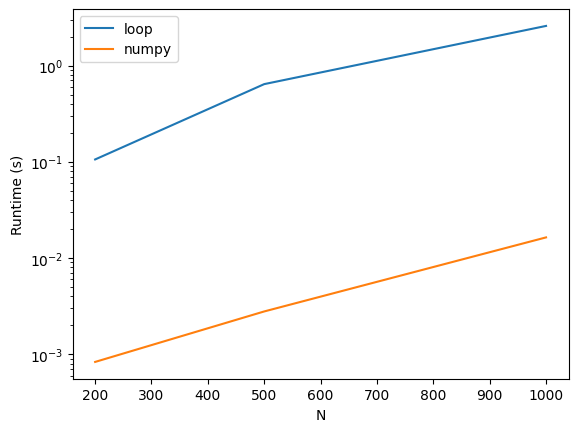

loop_distance_matrix: 2.57983 s, numpy_distance_matrix: 0.01640 s -> numpy is 157.3 times faster
Max difference: 8.88e-16


In [ ]:
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt

def loop_distance_matrix(points):
  """M_ij = sqrt( (x_i - x_j)**2 + (y_i - y_j)**2 + (z_i - z_j)**2)"""

  x, y, z = points

  N = len(x)
  M = np.zeros((N,N))

  for i in range(N):
    for j in range(N):

      M[i,j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)

  return M

def numpy_distance_matrix(points):

  x, y, z = points
  x = x.reshape(-1,1)
  y = y.reshape(-1,1)
  z = z.reshape(-1,1)

  return np.sqrt( (x - x.T)**2 + (y - y.T)**2 + (z - z.T)**2)


N = [200, 500, 1000]


plt.figure()

loop = []
numpy = []
for n in N:

  x = np.random.normal(size = n)
  y = np.random.normal(size = n)
  z = np.random.normal(size = n)

  points = np.array([x,y,z])

  start = perf_counter(); ldis = loop_distance_matrix(points); t_loop = perf_counter()-start
  start = perf_counter(); npdis = numpy_distance_matrix(points); t_numpy = perf_counter()-start


  loop.append(t_loop)
  numpy.append(t_numpy)

plt.plot(N, loop, label='loop')
plt.plot(N, numpy, label='numpy')
plt.xlabel('N')
plt.ylabel('Runtime (s)')
plt.semilogy() # y log scale
plt.legend()


plt.show()

print(f'loop_distance_matrix: {t_loop:.5f} s, numpy_distance_matrix: {t_numpy:.5f} s -> numpy is {t_loop/t_numpy:.1f} times faster')
print(f'Max difference: {np.max(np.abs(ldis - npdis)):.2e}')

2. Interpolation & reconstruction: reconstruct missing data from an irregularly sampled signal.
     - Create a 1D signal defined on [0,1] with a few sharp features and additive noise.
     - Randomly remove 30-50% of samples and reconstruct the signal using:
       - linear/cubic `interp1d`
       - smoothing spline (`UnivariateSpline`) with tuned `s`
       - basis regression (e.g., fit with a limited Fourier series)
     - Compare reconstructions with RMSE and visually.
       


[-0.37755102 -0.28571429 -0.25510204 -0.19387755 -0.16326531 -0.13265306
 -0.10204082  0.02040816  0.05102041  0.1122449   0.20408163  0.23469388
  0.35714286  0.41836735  0.47959184  0.60204082  0.69387755  0.81632653
  0.87755102  0.96938776]


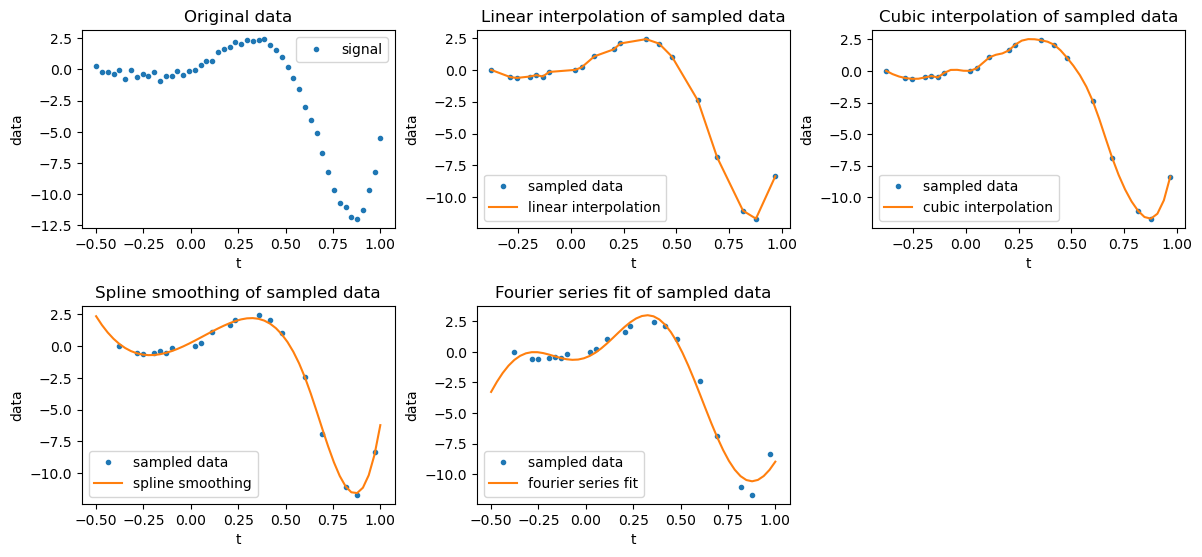

In [3]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

np.random.seed(1)

signal = lambda t: np.exp(3*t)*np.sin(6*t) + 0.2*np.random.normal(size=len(t))

t = np.linspace(-0.5,1, 50)
y = signal(t)

fig = plt.figure(figsize=(12,8))
ax = [fig.add_subplot(3, 3, i) for i in range(1,6)]

ax[0].plot(t, y, '.', label='signal')
ax[0].set_xlabel('t')
ax[0].set_ylabel('data')
ax[0].set_title('Original data')
ax[0].legend()


t_sample = np.sort(np.random.choice(t, size = int(0.5*len(t))))
t_sample = np.unique(t_sample) # remove duplicates

y_sample = signal(t_sample)

print(t_sample)

y_linar_interp = scp.interpolate.interp1d(t_sample, y_sample, kind='linear', bounds_error=False)(t)
y_cubic_interp = scp.interpolate.interp1d(t_sample, y_sample, kind='cubic', bounds_error=False)(t)

ax[1].plot(t_sample, y_sample, '.', label='sampled data')
ax[1].plot(t, y_linar_interp, label='linear interpolation')
ax[1].set_xlabel('t')
ax[1].set_ylabel('data')
ax[1].set_title('Linear interpolation of sampled data')
ax[1].legend()

ax[2].plot(t_sample, y_sample, '.', label='sampled data')
ax[2].plot(t, y_cubic_interp, label='cubic interpolation')
ax[2].set_xlabel('t')
ax[2].set_ylabel('data')
ax[2].set_title('Cubic interpolation of sampled data')
ax[2].legend()

# spline smoothing

spline = scp.interpolate.UnivariateSpline(t_sample, y_sample, s=1.0)
y_spline = spline(t)

ax[3].plot(t_sample, y_sample, '.', label='sampled data')
ax[3].plot(t, y_spline, label='spline smoothing')
ax[3].set_xlabel('t')
ax[3].set_ylabel('data')
ax[3].set_title('Spline smoothing of sampled data')
ax[3].legend()

# basic fourier series fit

def fourier_series(t, a0, a1, a2, b1, b2, T):
    return (a0 + a1*np.cos(2*np.pi*t/T) + b1*np.sin(2*np.pi*t/T) +
            a2*np.cos(4*np.pi*t/T) + b2*np.sin(4*np.pi*t/T))

p0 = [1,1,1,1,1,1]

params, pcov = scp.optimize.curve_fit(fourier_series, t_sample, y_sample, p0=p0)

y_fourier = fourier_series(t, *params)

ax[4].plot(t_sample, y_sample, '.', label='sampled data')
ax[4].plot(t, y_fourier, label='fourier series fit')
ax[4].set_xlabel('t')
ax[4].set_ylabel('data')
ax[4].set_title('Fourier series fit of sampled data')
ax[4].legend()

fig.tight_layout()
plt.show()



3. Fit a model to noisy data, compute parameter uncertainties
     - Generate your own 1D spectrum, similar to the sum-of-Gaussians dataset above
     - Fit using `curve_fit` and `least_squares`, compute covariance.
     - Report best-fit parameters, 1-sigma errors, and a short discussion about the different results.


True parameters: [0.5, 1.0, 1.0, -1.5, 0.5, 0.6]
curve_fit params: [ 0.49520183  0.98462816  0.99860487 -1.50191982  0.49507945  0.60426576]
covariance matrix:
 [[ 4.66737643e-05 -6.03460352e-06  1.08648024e-06  1.88992858e-06
   1.69145029e-05 -2.42621829e-06]
 [-6.03460352e-06  4.15091361e-04 -1.95371593e-04 -1.08488745e-05
  -1.16762169e-04  1.59458969e-07]
 [ 1.08648024e-06 -1.95371593e-04  1.90723681e-04  2.20974579e-06
   1.52950157e-05  8.03405831e-06]
 [ 1.88992858e-06 -1.08488745e-05  2.20974579e-06  6.34185713e-05
   4.73344296e-06 -3.22111899e-07]
 [ 1.69145029e-05 -1.16762169e-04  1.52950157e-05  4.73344296e-06
   5.57593728e-04 -3.11696676e-04]
 [-2.42621829e-06  1.59458969e-07  8.03405831e-06 -3.22111899e-07
  -3.11696676e-04  3.76197945e-04]]
1sigma errors: [0.00683182 0.02037379 0.01381027 0.00796358 0.02361342 0.01939582]

least_squares params: [ 0.49520186  0.984628    0.9986049  -1.5019199  -0.49508017  0.60426536]
covariance matrix:
 [[ 4.66736996e-05 -6.03466006e-0

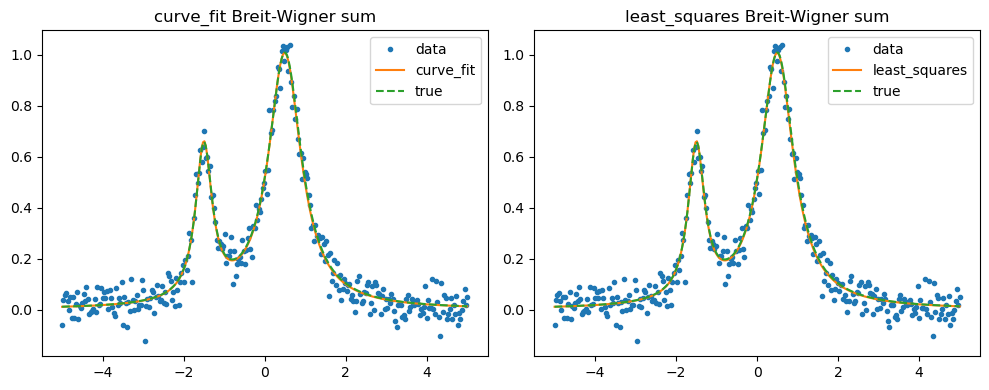

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, least_squares


def breitwigner(x, x0, gamma, A):
    return A * (0.5 * gamma)**2 / ((x - x0)**2 + (0.5 * gamma)**2)

x = np.linspace(-5, 5, 300)
true = breitwigner(x, x0=0.5, gamma=1.0, A=1.0) + breitwigner(x, x0=-1.5, gamma=0.5, A=0.6)
y = true + 0.05 * np.random.normal(size=x.shape)

print('True parameters:', [0.5, 1.0, 1.0, -1.5, 0.5, 0.6])

# Fit using curve_fit

def model_sum2(x, x01, gamma1, A1, x02, gamma2, A2):
    return breitwigner(x, x01, gamma1, A1) + breitwigner(x, x02, gamma2, A2)

p0 = [0.0, 1.0, 1.0, -2.0, 1.0, 1.0]
params, pcov = curve_fit(model_sum2, x, y, p0=p0)
errors = np.sqrt(np.diag(pcov))

print('curve_fit params:', params)
print('covariance matrix:\n', pcov)
print('1sigma errors:', errors)

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)

ax1.plot(x, y, '.', label='data')
ax1.plot(x, model_sum2(x, *params), '-', label='curve_fit')
ax1.plot(x, true, '--', label='true')
ax1.set_title('curve_fit Breit-Wigner sum')
ax1.legend()

print()
# Fit using least_squares

def residuals(p, x, y):
    return model_sum2(x, *p) - y

res = least_squares(residuals, x0=p0, args=(x, y))

params2 = res.x

## We have to compute the covariance matrix from the Jacobian
J = res.jac

cov2 = np.linalg.inv(J.T @ J) * np.sum(res.fun**2) / (len(y) - len(params2))

# res.fun = sum of residuals

errors2 = np.sqrt(np.diag(cov2))

print('least_squares params:', params2)
print('covariance matrix:\n', cov2)
print('approx 1sigma errors:', errors2)

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(x, y, '.', label='data')
ax2.plot(x, model_sum2(x, *params2), '-', label='least_squares')
ax2.plot(x, true, '--', label='true')
ax2.set_title('least_squares Breit-Wigner sum')
ax2.legend()

fig.tight_layout()
plt.show()

$\textcolor{red}{\text{NO SÉ POR QUÉ ESTO ES ASÍ!!!!}}$

In this case, we can see that if we take the covariance matrix in the least_squares fit to be:

$$ \text{cov} = (J^TJ)^{-1} \frac{\chi^2}{dof} $$

We get almost the same result as in the curve_fit approach. 

### ++ Exercise

Fit a 2D Gaussian model to a noisy image (2D array) using `least_squares` and estimate parameter uncertainties.
 - Generate a synthetic 2D image containing a tilted 2D Gaussian plus background and noise.
 - Implement a vectorized residual function and fit with `least_squares` (parameters: amplitude, x0, y0, sx, sy, theta, background).
 - Report fitted parameters, uncertainties, and show fitted image and residual map.


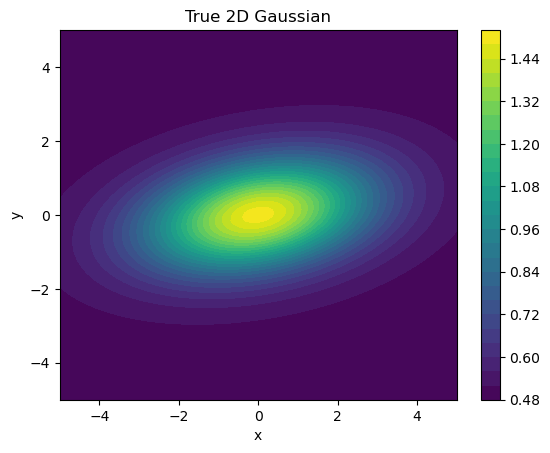

True parameters: [1, 0, 0, 2, 1, 0.2, 0.5]


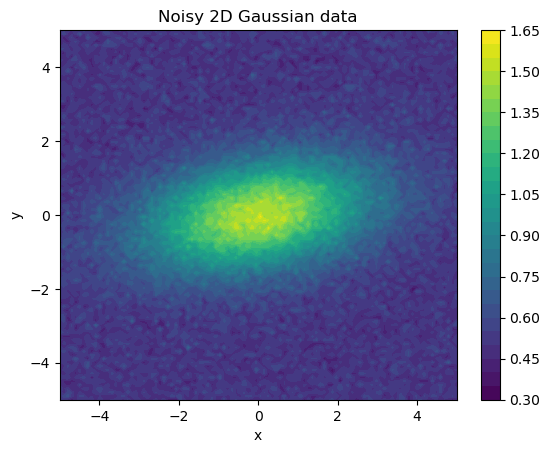

success: True
fitted params: [ 1.00069037e+00  6.13483943e-03 -2.40312264e-03  1.99512216e+00
  1.00011633e+00  3.34183357e+00  4.99350711e-01]
covariance matrix:
 [[ 8.09324255e-06 -1.09286081e-09 -1.64408398e-10 -8.01817085e-06
  -3.90858985e-06  1.52433683e-08 -5.68673502e-08]
 [-1.09286081e-09  3.11522444e-05  4.68540757e-06  2.86867803e-09
  -1.08740869e-09 -3.47561348e-10  5.62845216e-10]
 [-1.64408398e-10  4.68540757e-06  8.98531320e-06  4.72299754e-10
  -1.83371154e-10  7.92308642e-11  8.44927310e-11]
 [-8.01817085e-06  2.86867803e-09  4.72299754e-10  3.82760389e-05
   3.08379103e-06 -1.52424745e-09 -1.55857541e-06]
 [-3.90858985e-06 -1.08740869e-09 -1.83371154e-10  3.08379103e-06
   9.79403757e-06  2.49013141e-08 -8.89508447e-07]
 [ 1.52433683e-08 -3.47561348e-10  7.92308642e-11 -1.52424745e-09
   2.49013141e-08  7.23398085e-06 -1.48747769e-08]
 [-5.68673502e-08  5.62845216e-10  8.44927310e-11 -1.55857541e-06
  -8.89508447e-07 -1.48747769e-08  4.50059283e-07]]
approx 1sigma er

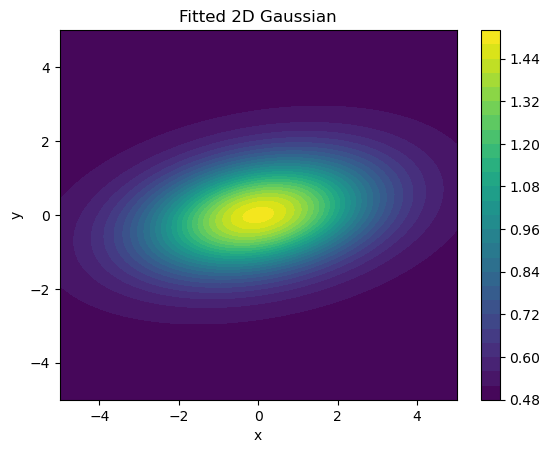

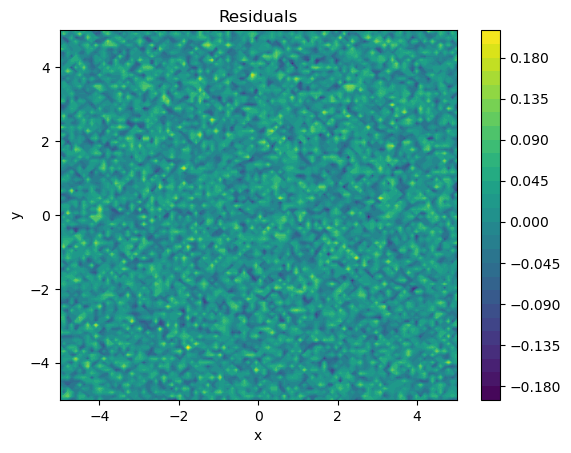

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def gaussian2D(x, y, A, x0, y0, sx, sy,theta, B):

    X = (x - x0)*np.cos(theta) + (y - y0)*np.sin(theta)
    Y = -(x - x0)*np.sin(theta) + (y - y0)*np.cos(theta)

    return A * np.exp(-0.5 * ((X/sx)**2 + (Y/sy)**2)) + B

x = y = np.linspace(-5,5, 100)
X, Y = np.meshgrid(x, y)

true_params = [1, 0, 0, 2, 1, 0.2, 0.5]

Z_true = gaussian2D(X, Y, *true_params)

plt.figure()
plt.contourf(X, Y, Z_true, levels=30)
plt.colorbar()
plt.title('True 2D Gaussian')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

print('True parameters:', true_params)

Z = Z_true + 0.05 * np.random.normal(size=Z_true.shape)

plt.figure()
plt.contourf(X, Y, Z, levels=30)
plt.colorbar()
plt.title('Noisy 2D Gaussian data')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

# Fit using least_squares

def residuals(p, x, y, z):

    model = gaussian2D(x, y, *p)
    return (model - z).ravel() # ravel makes it 1d

p0 = [0,0,0,1,1,0,0]

res = least_squares(residuals, x0=p0, args=(X, Y, Z))

print('success:', res.success)

params = res.x
print('fitted params:', params)

## Compute uncertainties

J = res.jac

cov = np.linalg.inv(J.T @ J)* np.sum(res.fun**2) / (Z.size - len(params))
errors = np.sqrt(np.diag(cov))

print('covariance matrix:\n', cov)
print('approx 1sigma errors:', errors)

# fitted image

Z_fit = gaussian2D(X, Y, *params)
plt.contourf(X, Y, Z_fit, levels=30)
plt.colorbar()
plt.title('Fitted 2D Gaussian')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

# residual map

Z_resid = Z - Z_fit
plt.contourf(X, Y, Z_resid, levels=30)
plt.colorbar()
plt.title('Residuals')
plt.xlabel('x'); plt.ylabel('y')
plt.show()